## 회귀



In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas import DataFrame

import sklearn

import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn import tree


### 다음과 같은 종속 변수 Y와 두 개의 독립 변수 X1,X2를 갖고 있는 데이터가 있습니다. Regressing Tree를 통해 Y를 예측하고자 할 때, 처음으로 분할 되는 변수 및 분할 point를 찾아 주세요.

[Text(133.92000000000002, 181.2, 'X[0] <= 5.0\nmse = 2.667\nsamples = 3\nvalue = 6.0'),
 Text(66.96000000000001, 108.72, 'mse = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(200.88000000000002, 108.72, 'X[0] <= 8.0\nmse = 1.0\nsamples = 2\nvalue = 7.0'),
 Text(133.92000000000002, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = 6.0'),
 Text(267.84000000000003, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = 8.0')]

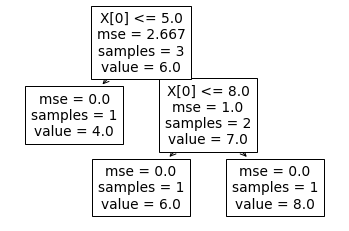

In [2]:
#Image("C:/Users/kdh2/Desktop/세션강의자료/2.png")
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X_train= np.array([[4,6],[6,8],[10,3]])
Y_train= np.array([[4],[6],[8]])

dt_reg=DecisionTreeRegressor()
dt_reg = dt_reg.fit(X_train, Y_train)
tree.plot_tree(dt_reg)

#따라서 처음으로 분할되는 변수는 X1이고, 분할 포인트는 X1이 5보다 작은가 입니다.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
#보스톤 데이터셋은 범죄율, 강의 인접 유무, 세금 등 13개의 변수를 가지고 있으며, 주택 가격을 라벨 데이터로 가지고 있습니다

### <특징 데이터>
CRIM: 범죄율<br>
INDUS: 비소매상업지역 면적 비율<br>
NOX: 일산화질소 농도<br>
RM: 주택당 방 수<br>
LSTAT: 인구 중 하위 계층 비율<br>
B: 인구 중 흑인 비율<br>
PTRATIO: 학생/교사 비율<br>
ZN: 25,000 평방피트를 초과 거주지역 비율<br>
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0<br>
AGE: 1940년 이전에 건축된 주택의 비율<br>
RAD: 방사형 고속도로까지의 거리<br>
DIS: 직업센터의 거리<br>
TAX: 재산세율<br>

In [4]:
data = boston.data
label = boston.target
columns = boston.feature_names
label

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
data = pd.DataFrame(data, columns = columns)
label=pd.DataFrame(label,columns=['label'])

data.head()
label

,label
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
from sklearn.model_selection import train_test_split

#변수를 split 해주세요
x_train, x_test, y_train, y_test = train_test_split(data,label, test_size=0.3, random_state=30)

### DecisionTreeRegressor와 DecisionTreeClassifier를 쓰는 상황을 구분하여 작성 해주세요

DecisionTreeRegressor는 종속변수의 형태가 연속형인 경우에 사용하는 회귀모델이고, DecisionTreeClassifier는 종속 변수의 형태가 범주형인 경우에 사용하는 분류 모델입니다.

In [7]:
x_train['RM']

136    5.942
462    6.317
403    5.349
409    6.852
228    7.686
       ...  
500    6.027
301    6.590
429    6.380
421    6.006
293    6.127
Name: RM, Length: 354, dtype: float64

### Decision Tree Regressor


#### 1) x 변수로 'RM' 변수를, y 변수는 주택 가격으로 하여 회귀트리모델을 돌려주세요.<br>

In [8]:
#1) 트리의 max_depth는 5로 지정해주세요
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=5)
#fit()을 이용하여 모델 학습
tree_reg.fit(x_train['RM'].values.reshape(-1, 1),y_train)
#예측값=
pred = tree_reg.predict(x_test['RM'].values.reshape(-1,1))

#### 2) R<sup>2</sup> 으로 회귀 모델이 데이터를 잘 표현하는지 확인해주세요.
(R<sup>2</sup>값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미합니다.)

In [9]:
from sklearn.metrics import r2_score

print(r2_score(y_test,pred))

0.5038937137697731


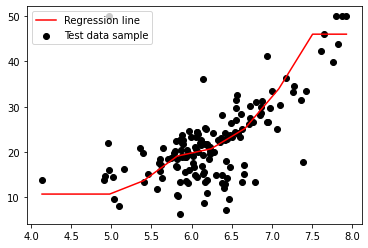

In [10]:
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']), 10)
line_y = tree_reg.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test['RM'].values.reshape((-1, 1)), y_test, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

#### 변수 하나로는 R<sup>2</sup>값이 높지 않은 것을 확인하였습니다.
#### 3) 13개의 변수를 모두 사용해 결정 트리 회귀 모델을 사용해 보세요. 

In [11]:
#파라미터 조정 자유입니다. 
tree_reg2=DecisionTreeRegressor()

#fit()을 이용하여 모델 학습
tree_reg2.fit(x_train,y_train)
#예측값=
pred2 = tree_reg2.predict(x_test)
print(r2_score(y_test,pred2))

0.7259350413218316


# 분류

In [12]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
!ls "/content/gdrive/My Drive/BOAZ"

adult_data.csv	adult_names.txt  train.csv


In [14]:
cd /content/gdrive/My Drive/BOAZ

/content/gdrive/My Drive/BOAZ


In [15]:
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

adult_columns = list()
for l in open('adult_names.txt'):
    adult_columns = l.split()

In [16]:
data = pd.read_csv("adult_data.csv", names = adult_columns)
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [17]:
label = data['income']
del data['income']
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [18]:
label

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [19]:
data.shape

(48842, 14)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [21]:
# Pandas get_dummies 함수를 사용해 범주형 변수를 One-Hot Encoding하고, 라벨 데이터를 0,1 로 변경
data = pd.get_dummies(data)
label = label.map(lambda x : 0 if x =='>50K' else 1)
data
label.sum()


37155

## Cross Validation

In [22]:
from sklearn.model_selection import train_test_split

# (Train, Valid), Test 분할
X_train, X_test, y_train,y_test=train_test_split(data,label,test_size=0.2,random_state=785)

In [23]:
# Train, Valid 분할
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=785)

In [24]:
#랜덤 포레스트로 모델을 학습시켜 주세요.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Valid 데이터로 검증
y_pred=rf.predict(X_valid)
print("랜덤 포레스트 검증 데이터 정확도 : {:.2f}%".format(accuracy_score(y_valid,y_pred)*100))

# Test 데이터로 모델 평가
y_pred=rf.predict(X_test)
print("랜덤 포레스트 테스트 데이터 정확도 : {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

랜덤 포레스트 검증 데이터 정확도 : 85.20%
랜덤 포레스트 테스트 데이터 정확도 : 85.79%


## Parameter Tuning
간단히 GridSearchCV 함수를 사용해 랜덤 포레스트의 n_estimator, max_depth 파라미터 중 가장 좋은 파라미터 조합을 찾아보겠습니다.<br>
GridSearchCV 함수는 Sklearn의 model_selection 패키지에 있습니다.<br>

In [25]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators':[100], 
    #n_estimators를 여러개로 주면 너무 느려서 한개로 했습니다. 여러개로 돌려보시고 더 높은 성능이 나오면 그것으로 해도 무방합니다
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

#위의 리스트 값말고 다른값들로 돌려보았을 때 괜찮은 값 있으면 변경하셔도 됩니다.

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_class = RandomForestClassifier()
grid_cv=GridSearchCV(rf, params)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.8574


In [26]:
from sklearn.model_selection import cross_val_score

# 위에서 나온 최적 하이퍼 파라미터로 모델을 학습시켜 주세요.
rf_class=RandomForestClassifier(max_depth=12,min_samples_leaf=8,min_samples_split= 8)
rf_class.fit(X_train,y_train)
pred = rf_class.predict(X_test)


print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.8640


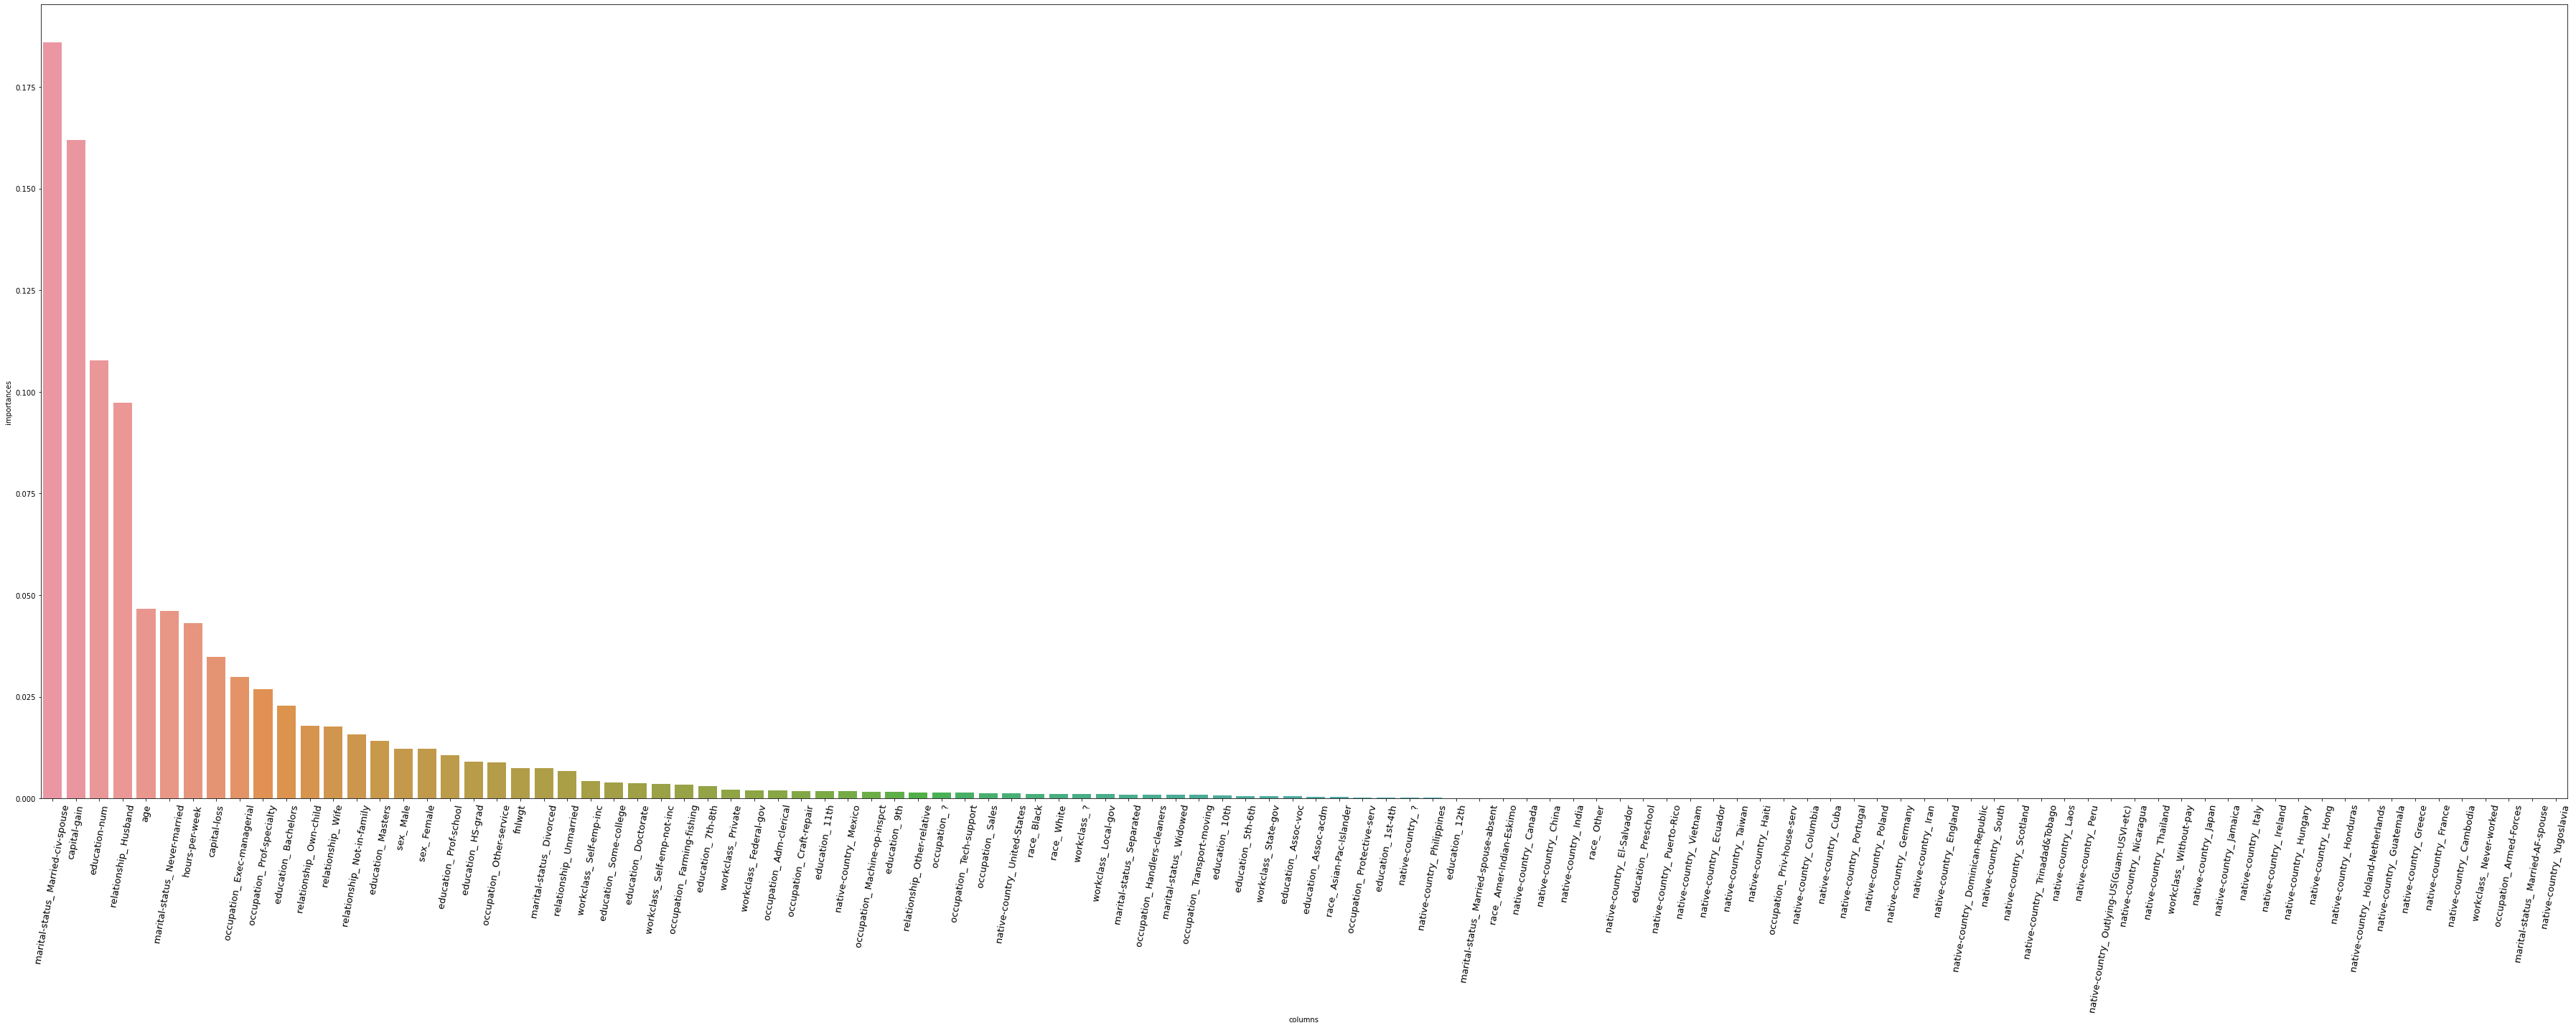

In [27]:
# 개별 feature들의 중요도를 시각화해주세요.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#feature별 중요도
feature_importance=rf_class.feature_importances_

#정렬
df_import=pd.DataFrame({'columns':X_train.columns, 'importances':feature_importance})
df_import=df_import.sort_values(by=['importances'], ascending=False)

#plot
fig=plt.figure(figsize=(50,20))
ax=sns.barplot(df_import['columns'],df_import['importances'])
ax.set_xticklabels(df_import['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

#### 50개의 변수에 대한 200개의 관측치를 갖는 데이터 셋을 갖고 있다고 가정합시다. 랜덤 포레스트를 돌려 importance plot을 그리고 나서, 그 결과를 바탕으로 상위 10개의 변수를 이용하여 선형 회귀를 fit했다고 가정해봅시다. 이때 회귀 모델이 랜덤 포레스트에 비해 성능이 훨씬 안 좋았습니다. 이러한 결과가 도출된 이유(가능성)에 대해서 두 가지 이상 제시해주세요.
- 먼저 변수가 50개로 너무 많기 때문에 오버피팅이 일어날 수 있다. 선형회귀는 이를 방지할 방법이 없기 때문에 성능이 떨어질 수 있다.
- Feature importance가 높다는 것이 단순히 해당 변수가 타겟 변수와 함수적 관계가 있다는 것을 의미하지는 않기 때문에 성능이 안좋을 수 있다.


## Voting Ensemble

#### 1) 모델 불러오기 및 정의하기

In [28]:
from sklearn.ensemble import VotingClassifier

#원하는 모델 3개를 골라 VotingClassifier을 돌려주세요.
#저는 성능 상관없이 모델을 가져왔는데 부담없이 원하시는 모델을 돌려주시면 됩니다ㅎㅎ


In [29]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
models=[('lgbm',LGBMClassifier()),
       ('xgbm',XGBClassifier()),
       ('svc',SVC(probability=True))]

soft_vote=VotingClassifier(models, voting='soft')
vote_cv=cross_validate(soft_vote,X_train,y_train,cv=5)

In [30]:
soft_vote.fit(X_train,y_train)
vote_pred=soft_vote.predict(X_test)
print(accuracy_score(pred,y_test))

0.8639574163169209


# 수고하셨습니다:)